In [2]:
# This is the code written during the 2nd Week of the development of our AIN311 Project
# by Alper Ozoner and Ali Utku Aydin

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import sklearn
import json

warnings.filterwarnings("ignore")

In [3]:
with open('ex1.txt') as f:
    lines = f.readlines()

In [4]:
dataDict = {}
for i,line in enumerate(lines):
    lineDict = json.loads(line)
    dataDict[i] = lineDict

In [5]:
dataDict[0]['values']

{'frame': {'avg': {'x': 902.1985, 'y': 449.9956},
  'fix': False,
  'lefteye': {'avg': {'x': 906.9514, 'y': 429.5481},
   'pcenter': {'x': 0.3574, 'y': 0.1919},
   'psize': 24.2255,
   'raw': {'x': 906.9514, 'y': 429.5481}},
  'raw': {'x': 902.1985, 'y': 449.9956},
  'righteye': {'avg': {'x': 897.4456, 'y': 470.4431},
   'pcenter': {'x': 0.6152, 'y': 0.1875},
   'psize': 24.6747,
   'raw': {'x': 897.4456, 'y': 470.4431}},
  'state': 7,
  'time': 449677194,
  'timestamp': '2022-11-21 18:27:51.690'}}

In [6]:
len(dataDict)

1403

In [7]:
trackerDict = {}
j = 0
for i in range(len(dataDict)):
    if(dataDict[i]['category'] == 'tracker'):
        trackerDict[j] = dataDict[i]
        j += 1

In [8]:
len(trackerDict)

1266

In [9]:
fixationDict = {}
j = 0
for i in range(len(trackerDict)):
    if(trackerDict[i]['values']['frame']['fix'] == True):
        fixationDict[j] = trackerDict[i]
        j += 1

In [10]:
eyeTrackdf = pd.DataFrame( columns=list('xy'))

In [11]:
for i in range(len(fixationDict)):
    x = fixationDict[i]['values']['frame']['raw']['x']
    y = fixationDict[i]['values']['frame']['raw']['y']   
    eyeTrackdf = eyeTrackdf.append({'x':x,'y':y}, ignore_index=True) 

In [12]:
xFixation = pd.DataFrame(eyeTrackdf['x'])
yFixation = pd.DataFrame(eyeTrackdf['y'])

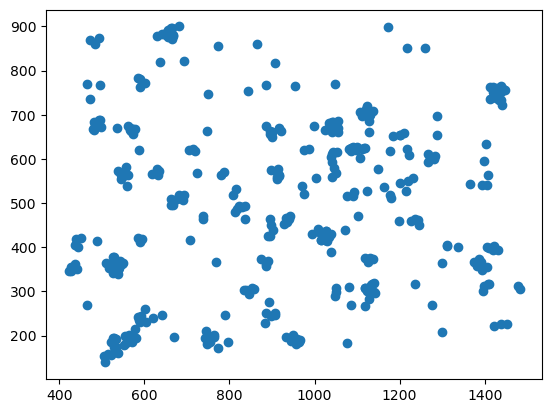

In [13]:
plt.scatter(xFixation,yFixation)

In [14]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

# Find the highest scoring n_clusters and print it
scores = []
i = 2
for n_clusters in range(2,20):
    km = KMeans (n_clusters=n_clusters)
    preds = km.fit_predict(yFixation)
    centers = km.cluster_centers_
    score = silhouette_score(yFixation, preds, metric='cityblock')
    scores.append(score)

for score in scores:
    if score == max(scores):
        best_n_clusters = i;
    i += 1;
    
print ("For n_clusters = {}, silhouette score is {}".format(best_n_clusters, "{:.3f}".format(max(scores))))

For n_clusters = 12, silhouette score is 0.673


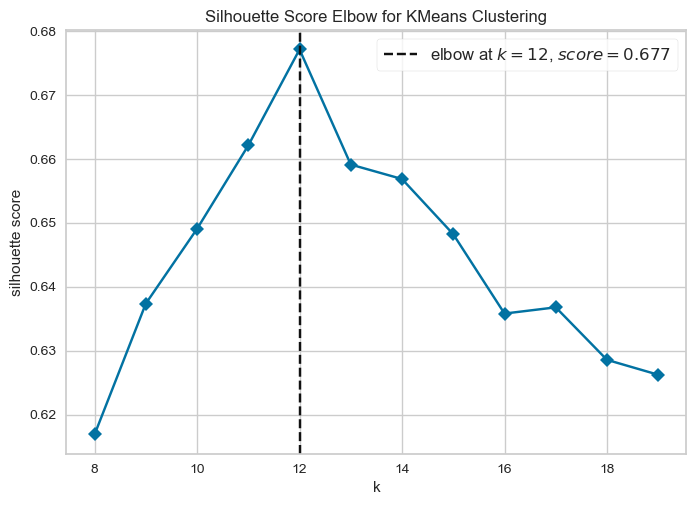

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [15]:
from yellowbrick.cluster import KElbowVisualizer
km = KMeans (n_clusters=best_n_clusters)
visualizer = KElbowVisualizer(
    km, k=(8,20),metric ='silhouette', timings=False
)

visualizer.fit(yFixation) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

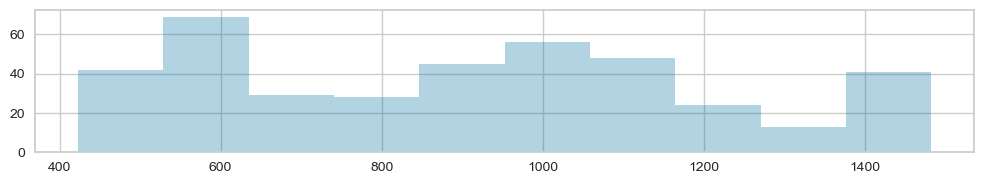

In [16]:
# Creating histogram
n_bins = 10
fig, axs = plt.subplots(1, 1, figsize =(10, 2), tight_layout = True)
axs.hist(xFixation, bins = n_bins, alpha = 0.3)
# Show plot
plt.show()
plt.close()

In [17]:
# Clustering the datapoints based on their row placement deduced from the 14-clustered kMeans output.

km = KMeans (n_clusters=14).fit(yFixation)
cluster_map = pd.DataFrame()
cluster_map['data_index'] = yFixation.index.values
cluster_map['cluster'] = km.labels_

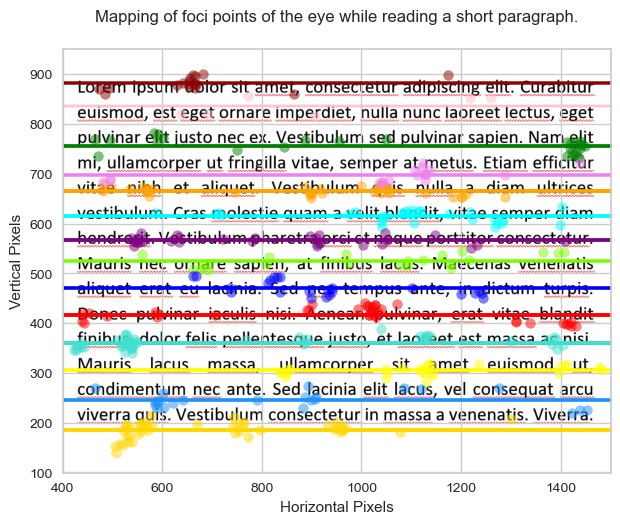

In [18]:
# Graphing all 14 clusters alongside their respective cluster centers drawn as horizontal lines.
centers = km.cluster_centers_
colors = ['darkred','red','orange','gold','yellow','lawngreen','green','turquoise','cyan','dodgerblue','blue','pink','violet','purple']
im = plt.imread('lipsum.png')
implot = plt.imshow(np.flipud(im), origin = 'lower')
for i in range(0,14):
    for index in cluster_map[cluster_map['cluster'] == i]['data_index']:
        x = eyeTrackdf['x'][index]
        y = eyeTrackdf['y'][index]
        plt.scatter(x,y, color = colors[i], alpha = 0.5)
        plt.scatter([950],centers[i], color = colors[i], s = 180000, marker='_',  alpha = 0.3)
plt.ylim(100,950)
plt.xlim(400,1500)
plt.title('Mapping of foci points of the eye while reading a short paragraph.', pad = 20)
plt.xlabel('Horizontal Pixels')
plt.ylabel('Vertical Pixels')
plt.show()

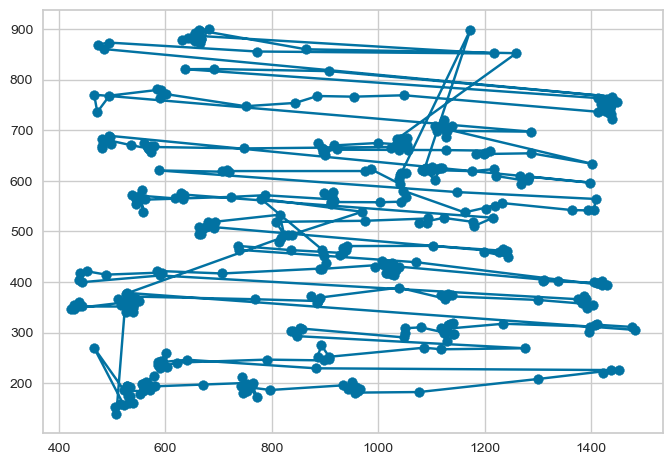

In [22]:
plt.scatter(xFixation,yFixation)
plt.plot(xFixation, yFixation)
plt.show()